<hr>
<h1 style="text-align: center;">Viscous Effects</h1>
<hr>

<h3 style="text-align: center;">Nicholas Richmond</h3>
<h3 style="text-align: center;">Student ID: 919578115</h3>
<h3 style="text-align: center;">Project #: 5</h3>
<h3 style="text-align: center;">Date: 12/01/24</h3>

<h3 style="text-align: center;">EAE 127: Applied Aerodynamics</h3>
<h3 style="text-align: center;">University of California, Davis</h3>

<hr>

In [214]:
#standard imports and setups
import math
import pandas as pd #type: ignore
import numpy as np #type: ignore
import os
import matplotlib.pyplot as plt #type: ignore
import matplotlib.lines as mlines
from scipy import integrate
from scipy.interpolate import interp1d
from scipy.signal import find_peaks
### JUPYTER NOTEBOOK SETTINGS ########################################
#Plot all figures in full-size cells, no scroll bars
%matplotlib inline
#Disable Python Warning Output
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')
### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package #type: ignore
#No Background fill, legend font scale, frame on legend
sns.set_theme(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#restore default matplotlib colormap
mplcolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(mplcolors)

#Get color cycle for manual colors
colors = sns.color_palette()
#SET MATPLOTLIB DEFAULTS
#(call after seaborn, which changes some defaults)
params = {
#FONT SIZES
'axes.labelsize' : 30, #Axis Labels
'axes.titlesize' : 30, #Title
'font.size' : 28, #Textbox
'xtick.labelsize': 22, #Axis tick labels
'ytick.labelsize': 22, #Axis tick labels
'legend.fontsize': 15, #Legend font size
'font.family' : 'serif',
'font.fantasy' : 'xkcd',
'font.sans-serif': 'Helvetica',
'font.monospace' : 'Courier',
#AXIS PROPERTIES
'axes.titlepad' : 2*6.0, #title spacing from axis
'axes.grid' : True, #grid on plot
'figure.figsize' : (8,8), #square plots
'savefig.bbox' : 'tight', #reduce whitespace in saved figures
#LEGEND PROPERTIES
'legend.framealpha' : 0.5,
'legend.fancybox' : True,
'legend.frameon' : True,
'legend.numpoints' : 1,
'legend.scatterpoints' : 1,
'legend.borderpad' : 0.1,
'legend.borderaxespad' : 0.1,
'legend.handletextpad' : 0.2,
'legend.handlelength' : 1.0,
'legend.labelspacing' : 0,
}
import matplotlib #type:ignore
matplotlib.rcParams.update(params) #update matplotlib defaults, call after￿
### END OF BOILERPLATE ##################################################
colors = sns.color_palette() #color cycle

### README
Before I forget to write this down, I would like my frustration to be heard about this project. These projects can take upwards of 20 hours to complete, and having one due the week of thanksgiving is extremely unfortunate and stressful. For me personally, I only get to see my extended family once every two years during this time, and now I get to have this hanging over my head. This frustration is compounded because, as of writing this, there have only been two grades submitted to us, including project 0. There have been two exams and four projects that are ungraded as we are heading into the final week of instruction; none of us know how we are performing in this class or even whether these projects are being done correctly.


I know that things happen and everyone is busy, but these projects appear to have seen almost no revision or proofreading (old dates, typos, conflicting information). To us as students, it appears as though we are being asked to put in disproportionate levels of work into this class and are receiving next to nothing in return. I don't speak for everyone, but I know that some people share the sentiment that it feels like our time is being disrespected.

## Problem 1: Boundary Layer Properties
***1.1: Flight conditions***

The first part of this project asks us to find the Reynolds number for two different flight conditions and then determine if our assumption of incompressible flow is valid. The first part is relatively straight forward. The second part involves calculating the mach number of the flow and comparing incompressible calcuations to compressible characteristics and noticing how they differ. If the two do not differ much, then our assumption is valid.

It is generally accepted as a rule of thumb that if the mach number is under ~ 0.3 the flow is incompressible.


In [189]:
#Calculate Reynolds numbers and Mach numbers
#Case 1 = Taxiing
#Case 2 = Cruise
c = 0.5 #ft
v1 = 12 #knots
v2 = 600 #knots

v1 *= 1.68781 #convert to feet per second
v2 *= 1.68781

a1 = 1116.4 #ft/s (speed of sound)   
a2 = 972.9 #ft/s

rho1 = 2.377e-3 #slugs/ft^3
rho2 = 0.7365e-3 #slugs/ft^3

mu = 3.737e-7 #lbs*s/ft^2 --> we are told to use the same viscosity for case 1 and 2

Re1 = v1*c*rho1/mu
Re2 = v2*c*rho2/mu

Ma1 = v1/a1
Ma2 = v2/a2

print("-----------------------------------------")
print("Reynolds number while taxiing: {:.4g}".format(Re1))
print("Reynolds number while cruising: {:.4g}".format(Re2))
print("Mach number while taxiing: {:.4g}".format(Ma1))
print("Mach number while cruising: {:.4g}".format(Ma2))
print("-----------------------------------------")

-----------------------------------------
Reynolds number while taxiing: 6.441e+04
Reynolds number while cruising: 9.979e+05
Mach number while taxiing: 0.01814
Mach number while cruising: 1.041
-----------------------------------------


The designated critical Reynolds number for this project is $5\times 10^5$, meaning case 1 (taxiing) is in the laminar region, and case 2 (cruising) is in the turbulent region.

Analysing the Mach numbers, we can see that in case 1 our assumption of incompressible flow is valid. However, for case 2, we can see that the cruising speed is about Mach 1. At that mach number, density changes by around $35\%$, which means our assumption of incompressibility is not valid. 
<hr>

***1.2: Boundary Layer Velocity Distribution***


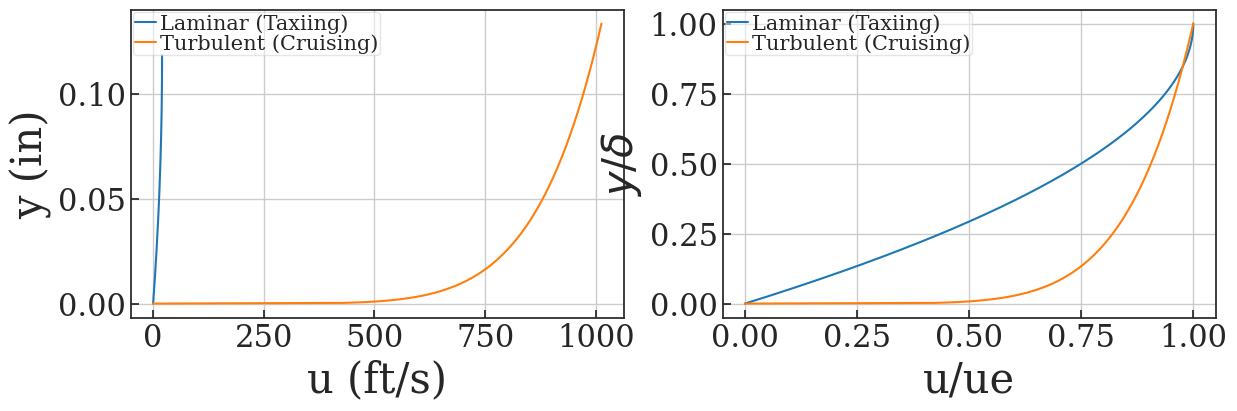

In [190]:
#plot dimensional and nondimensional boundary layer velocity distributions

ynon = np.linspace(0,1,401) #creates an array of 200 numbers evenly ranging from 0 to 1

unonL = 2*(ynon)-(ynon)**2 #Laminar boundary layer velocity distribution
unonT = ynon**(1/7) #Turbulent boundary layer velocity distribution

uL = unonL * v1 
uT = unonT * v2 

yL = ynon * (5*c/(Re1**(1/2))) * 12 #convert to inches
yT = ynon * (0.16*c/(Re2**(1/7))) * 12 #convert to inches

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(uL,yL,label = "Laminar (Taxiing)")
plt.plot(uT,yT, label = "Turbulent (Cruising)")
plt.xlabel("u (ft/s)")
plt.ylabel("y (in)")
plt.legend(loc = "best")

plt.subplot(1,2,2)
plt.plot(unonL,ynon,label = "Laminar (Taxiing)")
plt.plot(unonT,ynon,label = "Turbulent (Cruising)")
plt.xlabel("u/ue")
plt.ylabel("$y/ \delta$")
plt.legend(loc = "best");

Analysis: 

Turbulent boundary layers have a higher velocity and thus more momentum closer to the surface of the airfoil which is able to counteract the effects of an adverse pressure gradient. This is because an adverse pressure gradient "pushes" the velocity backwards close to the airfoil, so by having more momentum to "push back", turbulent boundary layers resist adverse pressure gradient effects more than laminar boundary layers.

However, due to the less steep velocity gradient close to the airfoil and higher velocities, there is a higher skin friction drag. This is because drag is proportional to velocity, so a higher velocity will cause more friction.
<hr>

***1.3: Friction Drag***
This part of the problem has us compute the coefficient of friction over the antenna and then compute the force of friction.

In [191]:
#Calculate friction coefficient and force

CfL = 1.328/(Re1**(1/2)) * 2 #multiply by 2 becuase there are two sides of the plate
CfT = 0.074/(Re2**(1/5)) * 2

print("-----------------------------------------------------")
print("Coefficient of skin friction while taxiiing: {:.4g}".format(CfL))
print("Coefficient of skin friction while cruising: {:.4g}".format(CfT))
print("-----------------------------------------------------")

depth = 10 #inches
depth /= 12 #convert to feet
antennaArea = depth * c

Ffric1 = (1/2) * rho1 * CfL * v1**2 * antennaArea
Ffric2 = (1/2) * rho2 * CfT * v2**2 * antennaArea

print("-----------------------------------------------------")
print("Force of skin friction while taxiiing: {:.4g} lbf".format(Ffric1))
print("Force of skin friction while cruising: {:.4g} lbf".format(Ffric2))
print("-----------------------------------------------------")



-----------------------------------------------------
Coefficient of skin friction while taxiiing: 0.01046
Coefficient of skin friction while cruising: 0.009342
-----------------------------------------------------
-----------------------------------------------------
Force of skin friction while taxiiing: 0.002126 lbf
Force of skin friction while cruising: 1.47 lbf
-----------------------------------------------------


Based on these values, the amount of drag produced by the antenna is completely insignificant at taxiing speeds and very small at cruising speeds. At cruising speeds, there is around 1.5 lbf of drag, which is very small, but not necessarily insignificant if there are other structures like it that are added.

<hr>

## Problem 2: Boundary Layers and Pressure Gradients
***2.1: Airfoil Boundary Layer Thickness Example***


Length at which Reynolds number becomes critical: 4.2581ft


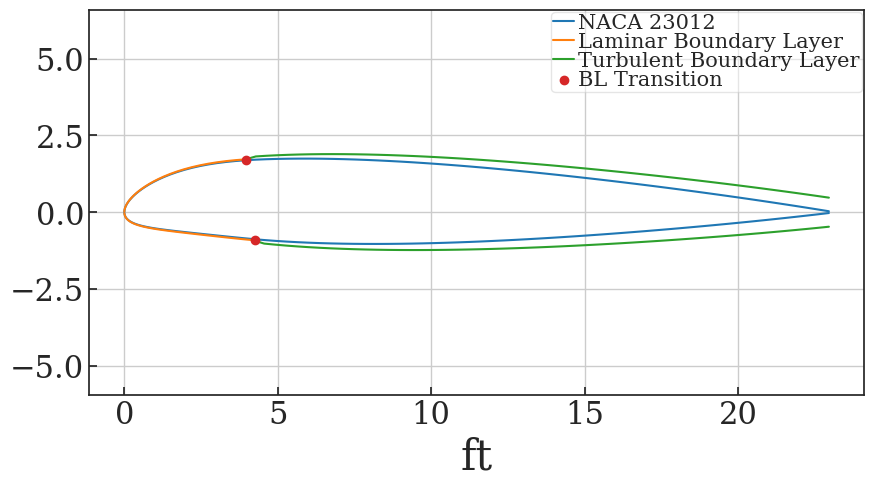

In [192]:
#

rho = 1.4956e-3 #slugs/ft^3
mu = 3.343e-7 #lb*s/ft^2
v = 8 #m/s
c = 7 #meters

#convert meters to feet
v *= 3.28084
c *= 3.28084

xCharacteristic = np.linspace(0,c,10000000) #characteristic length along the airfoil
ReX = rho*v*xCharacteristic/mu
ReCr = 0
for i,re in enumerate(ReX):
    #loop through all Re, and when it is greater than the critical re as described in the problem, return the length
    if re > 5e5:
        print(f"Length at which Reynolds number becomes critical: {xCharacteristic[i]:.5g}ft")
        xCr = xCharacteristic[i]
        break

folder = 'airfoil-data'
filename = os.path.join(folder,"naca23012.txt")
x23012, z23012 = np.loadtxt((filename),dtype=float,skiprows=1,unpack=True)

x23012 *= c
z23012 *= c

xUpper23012 = []
xLower23012 = []
zUpper23012 = []
zLower23012 = []

for i,z in enumerate(z23012):
    if z > 0:
        zUpper23012.append(z)
        xUpper23012.append(x23012[i])
    else:
        zLower23012.append(z)
        xLower23012.append(x23012[i])

xUpper23012 = xUpper23012[::-1]
zUpper23012 = zUpper23012[::-1]

#interpolate a new array for the reynolds number at each length so that the size of all the arrays are the same
f = interp1d(xCharacteristic, ReX, kind='linear')
ReXNew = f(xUpper23012)

upperBL = np.empty(len(xUpper23012))
lowerBL = np.empty(len(xLower23012))

for i,x in enumerate(xUpper23012):
    if x < xCr:
        upperBL[i] = (5*xUpper23012[i]/(ReXNew[i]**(1/2)))
    else:
        upperBL[i] = (0.16*xUpper23012[i]/(ReXNew[i]**(1/7)))

for i,x in enumerate(xLower23012):
    if x < xCr:
        lowerBL[i] = -1*(5*xLower23012[i]/(ReXNew[i]**(1/2)))
    else:
        lowerBL[i] = -1*(0.16*xLower23012[i]/(ReXNew[i]**(1/7)))


upperSplitIndex = np.argmax(xUpper23012 > xCr) 
lowerSplitIndex = np.argmax(xLower23012 > xCr) 

upperBL += zUpper23012
lowerBL += zLower23012

plt.figure(figsize=(10,5))
plt.plot(xUpper23012,zUpper23012,color = colors[0],label = "NACA 23012")
plt.plot(xUpper23012[:upperSplitIndex],upperBL[:upperSplitIndex],color = colors[1],label = "Laminar Boundary Layer")
plt.plot(xUpper23012[upperSplitIndex - 1:],upperBL[upperSplitIndex - 1:],color = colors[2],label = "Turbulent Boundary Layer")
plt.plot(xLower23012,zLower23012,color = colors[0])
plt.plot(xLower23012[:lowerSplitIndex],lowerBL[:lowerSplitIndex],color = colors[1])
plt.plot(xLower23012[lowerSplitIndex - 1:],lowerBL[lowerSplitIndex - 1:],color = colors[2])
plt.scatter(xUpper23012[upperSplitIndex - 1],zUpper23012[upperSplitIndex],color = colors[3],zorder = 2,label = "BL Transition")
plt.scatter(xCr,zLower23012[lowerSplitIndex],color = colors[3],zorder = 2)
plt.legend(loc="best")
plt.xlabel("ft")
plt.axis("equal");



<hr>

***2.2: Favorable and Adverse Pressure Gradient***

This part of the problem asks to plot the pressure distributions for a NACA 23012 airfoil at various angles of attack. On those graphs, we are to differentiate between the upper and lower surfaces and find the point at which the flow transitions from a favorable pressure gradient to an adverse pressure gradient. 

The transition points can be found by using the ```find_peaks``` function from the scipy library. This will find any point where there is a local maximum (technically a local minimum due to the flipped y-axis). These are points of interest because a favorable pressure gradient occurs when as pressure is decreasing and is adverse when the pressure is increasing, so when the change in pressure is zero (at a peak), the flow is transitioning from a favorable pressure gradient to an adverse pressure gradient. At troughs, there would be transition from adverse to favorable; however we were not asked to find those.

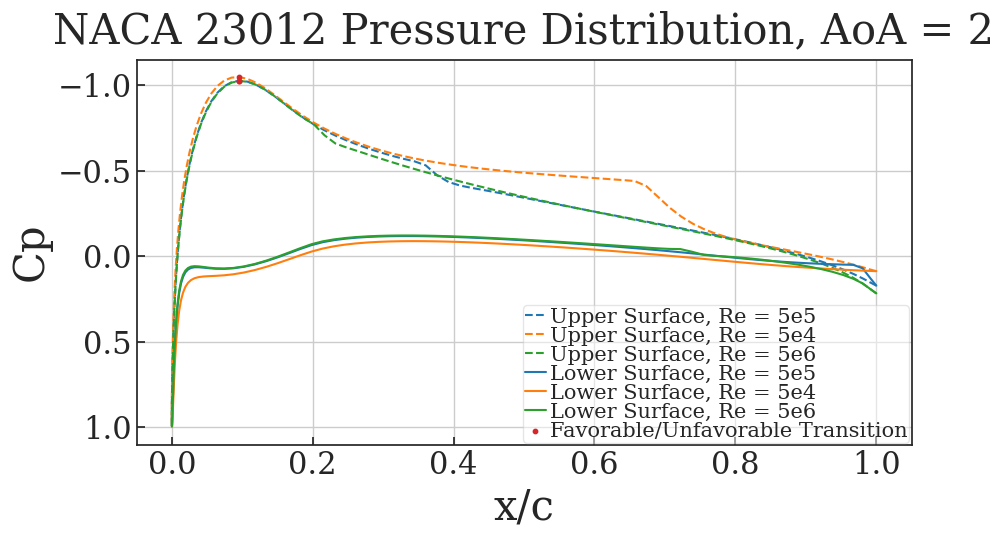

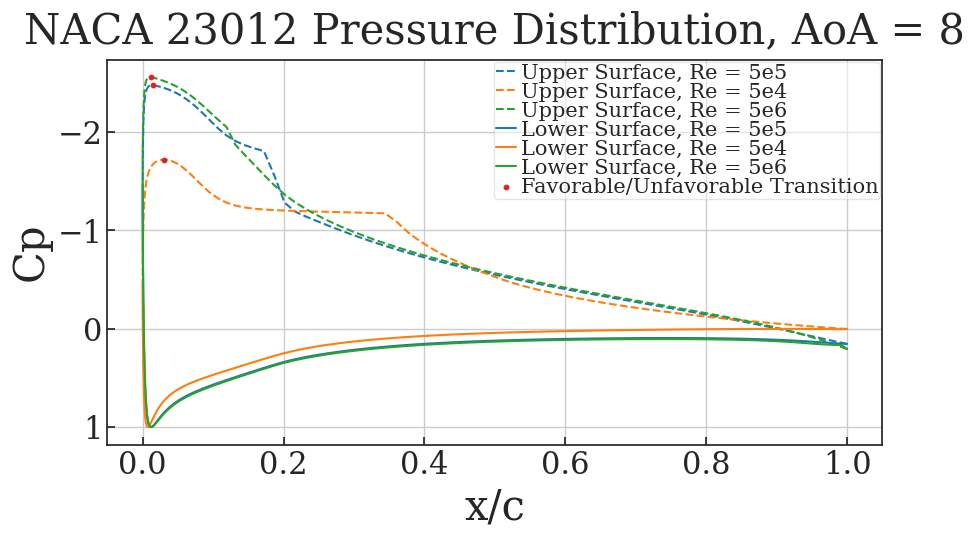

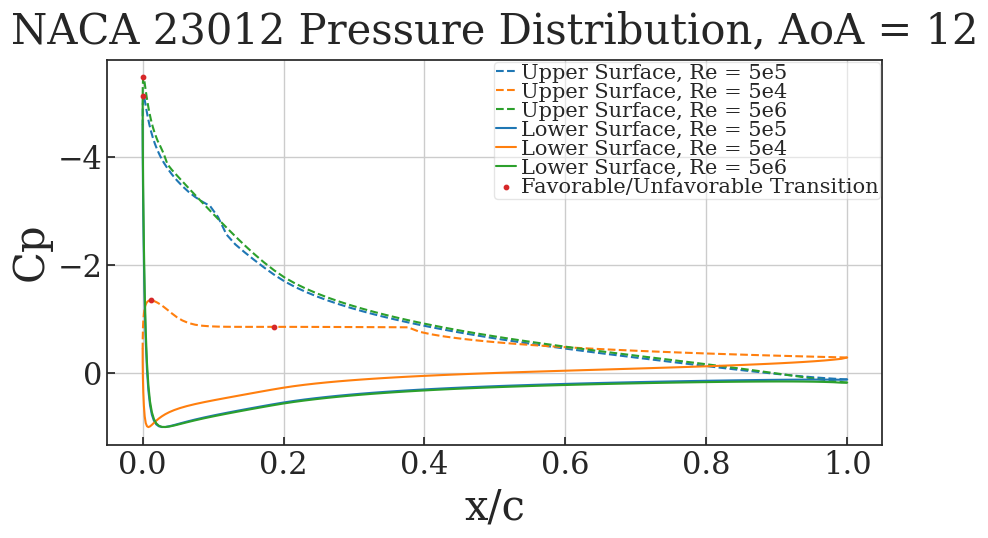

In [249]:
#pressure distributions

filename = os.path.join(folder,"naca23012a2CpReCr.txt")
x, a2CpReCr = np.loadtxt((filename),dtype=float,skiprows=1,unpack=True)
filename = os.path.join(folder,"naca23012a8CpReCr.txt")
x, a8CpReCr = np.loadtxt((filename),dtype=float,skiprows=1,unpack=True)
filename = os.path.join(folder,"naca23012a12CpReCr.txt")
x, a12CpReCr = np.loadtxt((filename),dtype=float,skiprows=1,unpack=True)
filename = os.path.join(folder,"naca23012a2CpRe5e4.txt")
x, a2CpRe5e4 = np.loadtxt((filename),dtype=float,skiprows=1,unpack=True)
filename = os.path.join(folder,"naca23012a8CpRe5e4.txt")
x, a8CpRe5e4 = np.loadtxt((filename),dtype=float,skiprows=1,unpack=True)
filename = os.path.join(folder,"naca23012a12CpRe5e4.txt")
x, a12CpRe5e4 = np.loadtxt((filename),dtype=float,skiprows=1,unpack=True)
filename = os.path.join(folder,"naca23012a2CpRe5e6.txt")
x, a2CpRe5e6 = np.loadtxt((filename),dtype=float,skiprows=1,unpack=True)
filename = os.path.join(folder,"naca23012a8CpRe5e6.txt")
x, a8CpRe5e6 = np.loadtxt((filename),dtype=float,skiprows=1,unpack=True)
filename = os.path.join(folder,"naca23012a12CpRe5e6.txt")
x, a12CpRe5e6 = np.loadtxt((filename),dtype=float,skiprows=1,unpack=True)

#split arrays into upper and lower surfaces
xUpper = x[:82]
xLower = x[81:]

a2CpReCrUpper = a2CpReCr[:82]
a2CpReCrLower = a2CpReCr[81:]
a8CpReCrUpper = a8CpReCr[:82]
a8CpReCrLower = a8CpReCr[81:]
a12CpReCrUpper = a12CpReCr[:82]
a12CpReCrLower = a12CpReCr[81:]
a2CpRe5e4Upper = a2CpRe5e4[:82]
a2CpRe5e4Lower = a2CpRe5e4[81:]
a8CpRe5e4Upper = a8CpRe5e4[:82]
a8CpRe5e4Lower = a8CpRe5e4[81:]
a12CpRe5e4Upper = a12CpRe5e4[:82]
a12CpRe5e4Lower = a12CpRe5e4[81:]
a2CpRe5e6Upper = a2CpRe5e6[:82]
a2CpRe5e6Lower = a2CpRe5e6[81:]
a8CpRe5e6Upper = a8CpRe5e6[:82]
a8CpRe5e6Lower = a8CpRe5e6[81:]
a12CpRe5e6Upper = a12CpRe5e6[:82]
a12CpRe5e6Lower = a12CpRe5e6[81:]

#find where local maximums and minimums are in the pressure distributions
a2CpReCrUpperPeaks, _ = find_peaks(-a2CpReCrUpper)
a2CpReCrLowerPeaks, _ = find_peaks(-a2CpReCrLower)
a8CpReCrUpperPeaks, _ = find_peaks(-a8CpReCrUpper)
a8CpReCrLowerPeaks, _ = find_peaks(-a8CpReCrLower)
a12CpReCrUpperPeaks, _ = find_peaks(-a12CpReCrUpper)
a12CpReCrLowerPeaks, _ = find_peaks(-a12CpReCrLower)

a2CpRe5e4UpperPeaks, _ = find_peaks(-a2CpRe5e4Upper)
a2CpRe5e4LowerPeaks, _ = find_peaks(-a2CpRe5e4Lower)
a8CpRe5e4UpperPeaks, _ = find_peaks(-a8CpRe5e4Upper)
a8CpRe5e4LowerPeaks, _ = find_peaks(-a8CpRe5e4Lower)
a12CpRe5e4UpperPeaks, _ = find_peaks(-a12CpRe5e4Upper)
a12CpRe5e4LowerPeaks, _ = find_peaks(-a12CpRe5e4Lower)

a2CpRe5e6UpperPeaks, _ = find_peaks(-a2CpRe5e6Upper)
a2CpRe5e6LowerPeaks, _ = find_peaks(-a2CpRe5e6Lower)
a8CpRe5e6UpperPeaks, _ = find_peaks(-a8CpRe5e6Upper)
a8CpRe5e6LowerPeaks, _ = find_peaks(-a8CpRe5e6Lower)
a12CpRe5e6UpperPeaks, _ = find_peaks(-a12CpRe5e6Upper)
a12CpRe5e6LowerPeaks, _ = find_peaks(-a12CpRe5e6Lower)


plt.figure(figsize=(10,5))
plt.gca().invert_yaxis()
plt.title("NACA 23012 Pressure Distribution, AoA = 2")
plt.ylabel("Cp")
plt.xlabel("x/c")
plt.plot(xUpper,a2CpReCrUpper,label = "Upper Surface, Re = 5e5",color = colors[0],linestyle = '--')
plt.plot(xUpper,a2CpRe5e4Upper,label = "Upper Surface, Re = 5e4",color = colors[1],linestyle = '--')
plt.plot(xUpper,a2CpRe5e6Upper,label = "Upper Surface, Re = 5e6",color = colors[2],linestyle = '--')
plt.plot(xLower,a2CpReCrLower,label = "Lower Surface, Re = 5e5",color = colors[0])
plt.plot(xLower,a2CpRe5e4Lower,label = "Lower Surface, Re = 5e4",color = colors[1])
plt.plot(xLower,a2CpRe5e6Lower,label = "Lower Surface, Re = 5e6",color = colors[2])

#plot favorable/adverse transition points
plt.scatter(x[a2CpReCrUpperPeaks],a2CpReCrUpper[a2CpReCrUpperPeaks],color = colors[3],zorder = 2,s=10,label = "Favorable/Unfavorable Transition")
plt.scatter(x[a2CpRe5e4UpperPeaks],a2CpRe5e4Upper[a2CpRe5e4UpperPeaks],color = colors[3],zorder = 2,s=10)
plt.scatter(x[a2CpRe5e6UpperPeaks],a2CpRe5e6Upper[a2CpRe5e6UpperPeaks],color = colors[3],zorder = 2,s=10)

#plt.scatter(x[a2CpReCrLowerPeaks],a2CpReCrLower[a2CpReCrLowerPeaks],color = colors[3],zorder = 2,s=10)
#plt.scatter(x[a2CpRe5e4LowerPeaks],a2CpRe5e4Lower[a2CpRe5e4LowerPeaks],color = colors[3],zorder = 2,s=10)
#plt.scatter(x[a2CpRe5e6LowerPeaks],a2CpRe5e6Lower[a2CpRe5e6LowerPeaks],color = colors[3],zorder = 2,s=10)

plt.legend(loc = "best")


plt.figure(figsize=(10,5))
plt.gca().invert_yaxis()
plt.ylabel("Cp")
plt.xlabel("x/c")
plt.title("NACA 23012 Pressure Distribution, AoA = 8")
plt.plot(xUpper,a8CpReCrUpper,label = "Upper Surface, Re = 5e5",color = colors[0],linestyle = '--')
plt.plot(xUpper,a8CpRe5e4Upper,label = "Upper Surface, Re = 5e4",color = colors[1],linestyle = '--')
plt.plot(xUpper,a8CpRe5e6Upper,label = "Upper Surface, Re = 5e6",color = colors[2],linestyle = '--')
plt.plot(xLower,a8CpReCrLower,label = "Lower Surface, Re = 5e5",color = colors[0])
plt.plot(xLower,a8CpRe5e4Lower,label = "Lower Surface, Re = 5e4",color = colors[1])
plt.plot(xLower,a8CpRe5e6Lower,label = "Lower Surface, Re = 5e6",color = colors[2])

#plot favorable/adverse transition points
plt.scatter(x[a8CpReCrUpperPeaks],a8CpReCrUpper[a8CpReCrUpperPeaks],color = colors[3],zorder = 2,s=10,label = "Favorable/Unfavorable Transition")
plt.scatter(x[a8CpRe5e4UpperPeaks],a8CpRe5e4Upper[a8CpRe5e4UpperPeaks],color = colors[3],zorder = 2,s=10)
plt.scatter(x[a8CpRe5e6UpperPeaks],a8CpRe5e6Upper[a8CpRe5e6UpperPeaks],color = colors[3],zorder = 2,s=10)

plt.legend(loc = "best")


plt.figure(figsize=(10,5))
plt.gca().invert_yaxis()
plt.ylabel("Cp")
plt.xlabel("x/c")
plt.title("NACA 23012 Pressure Distribution, AoA = 12")
plt.plot(xUpper,a12CpReCrUpper,label = "Upper Surface, Re = 5e5",color = colors[0],linestyle = '--')
plt.plot(xUpper,a12CpRe5e4Upper,label = "Upper Surface, Re = 5e4",color = colors[1],linestyle = '--')
plt.plot(xUpper,a12CpRe5e6Upper,label = "Upper Surface, Re = 5e6",color = colors[2],linestyle = '--')
plt.plot(xLower,a12CpReCrLower,label = "Lower Surface, Re = 5e5",color = colors[0])
plt.plot(xLower,a12CpRe5e4Lower,label = "Lower Surface, Re = 5e4",color = colors[1])
plt.plot(xLower,a12CpRe5e6Lower,label = "Lower Surface, Re = 5e6",color = colors[2])

#plot favorable/adverse transition points
plt.scatter(x[a12CpReCrUpperPeaks],a12CpReCrUpper[a12CpReCrUpperPeaks],color = colors[3],zorder = 2,s=10,label = "Favorable/Unfavorable Transition")
plt.scatter(x[a12CpRe5e4UpperPeaks],a12CpRe5e4Upper[a12CpRe5e4UpperPeaks],color = colors[3],zorder = 2,s=10)
plt.scatter(x[a12CpRe5e6UpperPeaks],a12CpRe5e6Upper[a12CpRe5e6UpperPeaks],color = colors[3],zorder = 2,s=10)

plt.legend(loc = "best");

Firstly, I noticed that on the graph for 12 degree angle of attack there is an extra transition point for the lower Reynolds number. At lower Reynolds numbers, flow begins to separate from the airfoils, and because of this there are regions of relatively constant pressure. This region was interpreted as a local maximum and thus as a transition point. I also noticed that the Reynolds number higher than the critical Reynolds number created a graph that was very similar to the critical reynolds number, likely because at this point the flow is entirely turbulent and behaves similar to other turbulent flows.

The location that the transition point was at seemed to stay roughly the same distance along the chord with changing the Reynolds number, although it did very slightly shift towards the aft of the airfoil with lower Reynolds numbers.

<hr>

## Problem 3: Viscous/Inviscid Interaction

***3.1: Dividing Streamline Displacement***

Nope I give up, this is not a lab class and I will not be spending the next 4 hours trying to get this entire project set up on a remote connect MAE computer all because the provided code doesn't run on Mac. Please, for future classes, provide functional reference material. For past projects I have spent hours trying to make pyxfoil work and eventually gave up. Setting up XFOIL to work on Mac was already hard enough and I do not have the time to fix the mistakes of TAs. If this were the only class I took I would spend more time, but as it is I cannot afford to spend more time doing menial code troubleshooting.
